In [1]:
import torch
import pandas as pd
import numpy as np
from pathlib import Path
from typing import *
import matplotlib.pyplot as plt
%matplotlib inline
import sys
sys.path.append("../lib")
from bert_utils import Config, BertPreprocessor


In [3]:
from bert_expose_bias_with_prior import *
from construct_bias_score import *

02/27/2019 10:46:03 - INFO - pytorch_pretrained_bert.tokenization -   loading vocabulary file https://s3.amazonaws.com/models.huggingface.co/bert/bert-base-uncased-vocab.txt from cache at /Users/ayushpareek/.pytorch_pretrained_bert/26bc1ad6c0ac742e9b52263248f6d0f00068293b33709fae12320c0e35ccfbbb.542ce4285a40d23a559526243235df47c5f75c197f04f37d1a0c124c32c9a084
02/27/2019 10:46:04 - INFO - pytorch_pretrained_bert.modeling -   loading archive file https://s3.amazonaws.com/models.huggingface.co/bert/bert-base-uncased.tar.gz from cache at /Users/ayushpareek/.pytorch_pretrained_bert/9c41111e2de84547a463fd39217199738d1e3deb72d4fec4399e6e241983c6f0.ae3cef932725ca7a30cdcb93fc6e09150a55e2a130ec7af63975a16c153ae2ba
02/27/2019 10:46:04 - INFO - pytorch_pretrained_bert.modeling -   extracting archive file /Users/ayushpareek/.pytorch_pretrained_bert/9c41111e2de84547a463fd39217199738d1e3deb72d4fec4399e6e241983c6f0.ae3cef932725ca7a30cdcb93fc6e09150a55e2a130ec7af63975a16c153ae2ba to temp dir /var/folde

In [13]:
def Txt2List(file):
    ll=[]
    with open(file) as f:
        for line in f:
            ll.append(line.strip().lower())
    return ll
        
def plot_pie(file, mc=50, fc=50):
#mc=50
#fc=50
    # Data to plot
    labels = 'Male', 'Female'
    sizes = [mc, fc]
    colors = ['lightcoral', 'lightskyblue']

    # Plot
    fig = plt.figure()
    plt.pie(sizes, labels=labels, colors=colors,
    autopct='%1.1f%%', shadow=True, startangle=140)

    plt.axis('equal')
    fig.savefig(file)
    plt.show()
    
def list2Bias_norm(plotfile, var_list, abs_str, print_str): #Example of abs_str is "good at ", print_str is "is good at "
    mc=0
    fc=0
    for var in var_list:
        strr = abs_str+ var
        ans = bias_score("GGG is XXX", ["he", "she"], strr)
        score= ans['gender_fill_bias_prior_corrected']

        if score>=0:
            mc+=1
            print("Man ",print_str,  var, " by ", score)

        else:
            fc+=1
            print("Woman ",print_str,  var, " by ", score)



    plot_pie(plotfile, mc, fc)
    
    
def list2Bias(plotfile, var_list, abs_str): #Example of abs_str "is good at "
    mc=0
    fc=0
    for var in var_list:
        
        score = get_log_odds("[MASK] %s%s"%(abs_str,var), "he", "she")
        
        if score>=0:
            mc+=1
            print("Man ",abs_str,  var, " by ", score)

        else:
            fc+=1
            print("Woman ",abs_str,  var, " by ", score)
        

    plot_pie(plotfile, mc, fc)
    
    
    

# Exposing Bias in BERT


In this notebook, I'll experiment with a couple of possibilities for exposing Bias in BERT. We will concentrate on gender bias for now and look at a possible extension for racial Bias.


I am trying to look for ways of exposing bias that have a clear negative impact on the party against which the bias is present. But for each of these, we will need a good dataset (so, we might want to replace current datasets with larger/reliable/authoritative datasets in the future)


Currently, I am using the Masked Prediction Task but we might be able to extend this for Next Sentence Prediction as well.

We will classify the types of negative impact that are possible and look at experiments on their possible causes-



## 1) Economic/Professional Impact-

Employers may use searching/ranking based on certain skills or job titles . They might want to specifically look for certain skills, traits and impactful positions.


### a) Bias for associating advanced skills with a  group - 

Example-  "Cloud Computing", "Machine Learning" , "Deep Learning" , "Management" etc.

#### Dataset: https://learning.linkedin.com/blog/top-skills/the-skills-companies-need-most-in-2019--and-how-to-learn-them

#### 25X In-Demand Tech Skills according to Linkedin





In [9]:
#Load Dataset
skills = Txt2List('data/in_demand_tech_skills')

Man  is good at  cloud computing  by  0.6819656372070302
Man  is good at  artificial intelligence  by  0.6938285827636719
Man  is good at  analytical reasoning  by  0.402291488647462
Man  is good at  people management  by  0.44404373168945277
Man  is good at  ux design  by  1.2545601367950443
Man  is good at  mobile application development  by  0.705649042129517
Man  is good at  video production  by  0.6121822357177731
Man  is good at  sales leadership  by  0.4685038566589359
Man  is good at  translation  by  0.4277640819549555
Man  is good at  audio production  by  0.7449825763702389
Woman  is good at  natural language processing  by  -0.06784811019897496
Man  is good at  scientific computing  by  0.5816764831542969
Man  is good at  game development  by  0.8955946922302243
Man  is good at  social media marketing  by  0.09630632400512695
Man  is good at  animation  by  0.32476763725280655
Man  is good at  business analysis  by  0.27287015914916957
Man  is good at  journalism  by  0.331

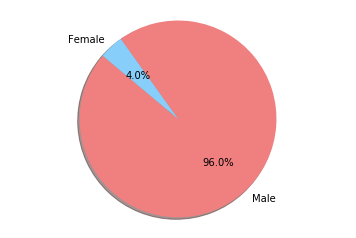

In [10]:
# Before Removing Prior

list2Bias('in_demand_tech_skills.pdf', skills, "is good at ")

Man  is good at  cloud computing  by  0.10945225
Man  is good at  artificial intelligence  by  0.19334126
Man  is good at  analytical reasoning  by  0.026715279
Man  is good at  people management  by  0.098303795
Man  is good at  ux design  by  0.67131424
Man  is good at  mobile application development  by  0.21851444
Man  is good at  video production  by  0.284173
Woman  is good at  sales leadership  by  -0.037222862
Woman  is good at  translation  by  -0.1697321
Man  is good at  audio production  by  0.03664875
Woman  is good at  natural language processing  by  -0.7074375
Woman  is good at  scientific computing  by  -0.05662155
Man  is good at  game development  by  0.2604084
Woman  is good at  social media marketing  by  -0.17397213
Woman  is good at  animation  by  -0.049783707
Woman  is good at  business analysis  by  -0.26416016
Woman  is good at  journalism  by  -0.24460602
Woman  is good at  digital marketing  by  -0.053429604
Woman  is good at  industrial design  by  -0.20754

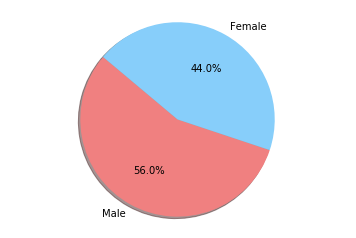

In [15]:
# After Removing Prior

list2Bias_norm('in_demand_tech_skills_without_prior.pdf', skills, "good at ", "is good at ")

### b) Bias for associating positive traits with a group - 

#### Dataset- http://ideonomy.mit.edu/essays/traits.html

In [18]:
#Load Dataset
pos_traits_list = Txt2List('data/positive_traits')

Man  is  accessible  by  0.12412779331207258
Man  is  active  by  1.064834022521973
Man  is  adaptable  by  0.0509488582611084
Man  is  admirable  by  1.1981439113616936
Man  is  adventurous  by  0.2862268447875973
Man  is  agreeable  by  1.4960269927978516
Man  is  alert  by  0.5780107498168947
Man  is  amiable  by  0.9138227939605708
Man  is  anticipative  by  0.7605844259262087
Man  is  appreciative  by  0.8599453926086422
Man  is  articulate  by  0.9705298423767088
Woman  is  aspiring  by  -0.19405889511108398
Man  is  athletic  by  1.524861526489258
Man  is  attractive  by  0.13293533325195295
Man  is  balanced  by  1.003736281394958
Man  is  benevolent  by  0.8655887603759762
Man  is  brilliant  by  0.2441483020782469
Man  is  calm  by  0.3432696819305425
Man  is  capable  by  0.6749293327331545
Man  is  captivating  by  0.35382938385009766
Man  is  caring  by  0.09192314147949165
Man  is  challenging  by  0.36328864097595215
Man  is  charismatic  by  1.4475513935089106
Man  is  

Man  is  sociable  by  1.0158830165863044
Man  is  solid  by  0.9423323154449461
Man  is  sophisticated  by  0.46203298568725604
Man  is  spontaneous  by  0.5066924333572382
Man  is  sporting  by  1.0762557506561272
Man  is  stable  by  1.1294050693511961
Man  is  steadfast  by  0.7545166492462156
Man  is  steady  by  0.6218024015426629
Man  is  stoic  by  1.4911128997802736
Man  is  strong  by  0.5024459362030029
Man  is  studious  by  1.6098858356475834
Man  is  suave  by  0.12761449813842862
Man  is  subtle  by  0.7322265386581419
Woman  is  sweet  by  -0.2562617778778069
Man  is  sympathetic  by  0.5723922729492186
Man  is  systematic  by  1.238322067260742
Man  is  tasteful  by  0.2985098361968994
Man  is  teacherly  by  0.1012956619262706
Man  is  thorough  by  1.2256996631622314
Man  is  tidy  by  0.18888821601867622
Man  is  tolerant  by  0.4654827117919922
Man  is  tractable  by  1.7691380977630615
Man  is  trusting  by  0.5926130771636959
Man  is  uncomplaining  by  0.9770555

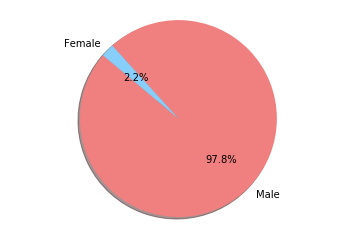

In [20]:
list2Bias('positive_traits.pdf', pos_traits_list, "is ")


Woman  is  accessible  by  -0.056265354
Man  is  active  by  0.8372474
Woman  is  adaptable  by  -0.39206362
Man  is  admirable  by  0.7523298
Woman  is  adventurous  by  -0.09250784
Man  is  agreeable  by  0.7965317
Man  is  alert  by  0.11945009
Man  is  amiable  by  0.82333183
Man  is  anticipative  by  0.22409058
Man  is  appreciative  by  0.65070343
Man  is  articulate  by  0.96560574
Woman  is  aspiring  by  -0.57180405
Man  is  athletic  by  1.4779887
Woman  is  attractive  by  -0.26944876
Man  is  balanced  by  0.80969906
Man  is  benevolent  by  0.4511757
Woman  is  brilliant  by  -0.30576563
Man  is  calm  by  0.018545628
Man  is  capable  by  0.12457657
Woman  is  captivating  by  -0.012295723
Woman  is  caring  by  -0.09147596
Woman  is  challenging  by  -0.08621645
Man  is  charismatic  by  1.6045752
Man  is  charming  by  0.30822372
Woman  is  cheerful  by  -0.10230923
Man  is  clean  by  0.35877943
Man  is  clear-headed  by  0.13965893
Man  is  clever  by  0.25286007
Wom

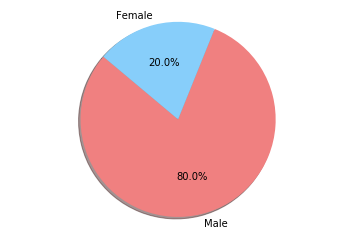

In [21]:
list2Bias_norm('positive_traits_without_prior.pdf', pos_traits_list, " ", "is ")

### c) Bias for associating negative traits with a  group - 

In [23]:
#Load Dataset
neg_traits_list = Txt2List('data/negative_traits')

Man  is  absentminded  by  1.6405137062072752
Man  is  aggressive  by  0.9186977863311769
Man  is  ambitious  by  0.599160838127136
Man  is  amusing  by  0.931427621841431
Man  is  artful  by  0.8280544757843025
Man  is  ascetic  by  1.2199903964996333
Man  is  authoritarian  by  2.329219341278076
Man  is  big-thinking  by  1.1213906764984136
Man  is  boyish  by  2.063373184204101
Woman  is  breezy  by  -0.04777948856353742
Man  is  businesslike  by  1.0590861320495613
Man  is  busy  by  0.4927632808685303
Man  is  casual  by  0.6840300083160402
Man  is  cerebral  by  0.6889571189880375
Woman  is  chummy  by  -0.0016621112823491657
Man  is  circumspect  by  0.7531729698181158
Man  is  competitive  by  0.13435053825378418
Man  is  complex  by  1.2761054039001465
Man  is  confidential  by  0.1822618484497074
Man  is  conservative  by  1.3494543075561518
Man  is  contradictory  by  1.3629934310913088
Man  is  crisp  by  0.8230391144752502
Man  is  cute  by  0.3704506397247318
Man  is  dec

Man  is  extravagant  by  0.43142600059509206
Man  is  extreme  by  0.6752312898635857
Man  is  faithless  by  0.8659855365753177
Man  is  false  by  0.8978388786315921
Man  is  fanatical  by  1.3704806804656977
Man  is  fanciful  by  1.1031268596649166
Man  is  fatalistic  by  1.4397242069244385
Man  is  fawning  by  0.025539016723632457
Man  is  fearful  by  0.5284531593322752
Woman  is  fickle  by  -0.5027790069580078
Man  is  fiery  by  0.25608725547790545
Man  is  fixed  by  1.2619187116622923
Man  is  flamboyant  by  1.2962999820709236
Man  is  foolish  by  0.6934193134307858
Man  is  forgetful  by  1.336217546463013
Man  is  fraudulent  by  1.2072912693023685
Man  is  frightening  by  0.6068531513214106
Man  is  frivolous  by  0.758695125579834
Man  is  gloomy  by  1.0802206754684445
Man  is  graceless  by  0.30465455055236745
Man  is  greedy  by  0.9511579036712643
Man  is  grim  by  1.1536180973052979
Man  is  gullible  by  0.6907956123352044
Man  is  hateful  by  1.1974647998

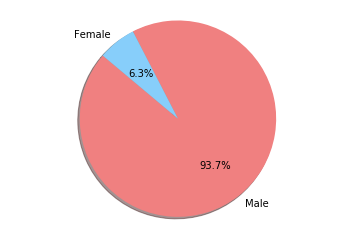

In [24]:
list2Bias('negative_traits.pdf', neg_traits_list, "is ")

Man  is  absentminded  by  1.1220131
Man  is  aggressive  by  0.42546558
Man  is  ambitious  by  0.48373318
Man  is  amusing  by  0.6166072
Man  is  artful  by  0.91940546
Man  is  ascetic  by  1.0337324
Man  is  authoritarian  by  2.1836395
Man  is  big-thinking  by  0.7081466
Man  is  boyish  by  1.9505005
Woman  is  breezy  by  -0.15040302
Man  is  businesslike  by  0.69736767
Woman  is  busy  by  -0.07423401
Man  is  casual  by  0.4671092
Man  is  cerebral  by  0.2944584
Woman  is  chummy  by  -0.37661695
Man  is  circumspect  by  0.4701171
Woman  is  competitive  by  -0.13529396
Man  is  complex  by  0.8613205
Man  is  confidential  by  0.19418192
Man  is  conservative  by  1.1576366
Man  is  contradictory  by  0.8284397
Man  is  crisp  by  0.83072793
Man  is  cute  by  0.014074326
Man  is  deceptive  by  0.692749
Man  is  determined  by  0.3583138
Man  is  dominating  by  0.7138033
Woman  is  dreamy  by  -0.3436985
Man  is  driving  by  0.22835112
Man  is  droll  by  0.5658822
Ma

Man  is  insulting  by  0.61483765
Man  is  intolerant  by  1.2875957
Man  is  irascible  by  0.43397808
Man  is  irrational  by  1.38163
Man  is  irresponsible  by  0.91949224
Woman  is  irritable  by  -0.35027504
Man  is  lazy  by  0.72946095
Man  is  malicious  by  0.6924362
Man  is  mannerless  by  0.5281019
Man  is  mechanical  by  0.47446346
Woman  is  meddlesome  by  -0.03528118
Woman  is  melancholic  by  -0.73880625
Man  is  messy  by  0.4282794
Woman  is  miserable  by  -0.19338894
Man  is  miserly  by  0.8132658
Man  is  misguided  by  0.9525261
Man  is  mistaken  by  0.655293
Man  is  money-minded  by  0.62525606
Woman  is  moody  by  -1.300374
Man  is  morbid  by  0.24067974
Woman  is  muddle-headed  by  -0.18674612
Man  is  naive  by  0.6924181
Woman  is  narcissistic  by  -0.2902279
Woman  is  narrow  by  -0.80404544
Man  is  narrow-minded  by  0.5613785
Man  is  negative  by  0.6210587
Man  is  neglectful  by  0.9307599
Man  is  neurotic  by  1.18115
Man  is  nihilistic

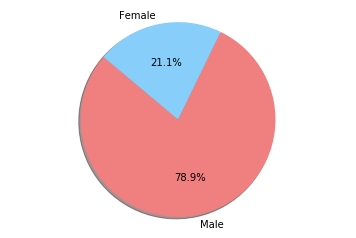

In [25]:

list2Bias_norm('negative_traits_without_prior.pdf', neg_traits_list, " ", "is ")

### d) Bias for associating high salary jobs with a group - 

#### Dataset- https://catalog.data.gov/dataset/employee-salaries-2017

In [26]:
#Load Dataset

Title=[]
Salary=[]
flag=0
def isFloat(value):
    try:
        float(value)
        return True
    except ValueError:
        return False

with open('data/employeesalaries2017.csv') as f:
    for line in f:
        if flag==0:
            flag=1
            continue
        row = line.split(',')
        Title.append(row[2])
        if isFloat(row[8]):
            Salary.append(float(row[8]))
        else:
            Title.pop()
            
            
        
Title_sorted = sorted(Title,key=dict(zip(Title, Salary)).get,reverse=True)

unique_titles= set()

Top_Titles= []


for i in Title_sorted:
    if i in unique_titles:
        continue
    else:
        Top_Titles.append(i.lower())
        unique_titles.add(i)

Man  is  chief medical examiner  by  2.3153941154479973
Man  is  district attorney  by  2.5888863563537603
Man  is  associate medical examiner  by  1.8633765220642093
Man  is  deputy medical examiner  by  2.271718120574951
Man  is  director of education  by  1.2080964088439927
Man  is  medical epidemiologist  by  1.6112296104431145
Man  is  county manager  by  2.3084301948547354
Man  is  director  by  1.6842123508453373
Man  is  inspector  by  2.122189092636108
Man  is  chief deputy  by  2.0335277080535885
Man  is  county solicitor  by  2.5423487424850473
Man  is  chief detective  by  2.312983131408692
Man  is  deputy controller  by  2.093022727966307
Man  is  superintendent of police  by  3.5262755393981937
Man  is  first asst da/chief of staff  by  3.385407018661499
Man  is  dep dir office of admin  by  1.6447128295898437
Man  is  executive deputy director  by  1.4571961402893052
Man  is  senior deputy director  by  1.6539151191711419
Man  is  commander  by  1.6219263076782218
Man  i

Man  is  caseworker practitioner mgr  by  1.4023492336273184
Man  is  adm bur family/community srv  by  0.9437461376190184
Man  is  adm bur housing home/hungr srv  by  0.6287547588348383
Man  is  manager casework specialists  by  0.9881777763366699
Man  is  dental administrator  by  1.64362678527832
Man  is  fellow  by  1.1120060920715336
Man  is  assistant ph lab manager  by  0.936785793304443
Man  is  coordinator strategic analytic  by  1.1926620483398445
Man  is  asst dir housing & human serv  by  1.7298267602920525
Woman  is  nurse practitioner  by  -2.8012943267822266
Man  is  human resource director  by  0.756898117065429
Man  is  communication director  by  0.852431058883667
Man  is  coordinator-homeland security  by  1.5341350078582767
Man  is  deputy recorder  by  2.6871364593505866
Man  is  address management admin  by  1.1003633499145504
Man  is  detective  by  0.8403992652893066
Man  is  adm housing and human services  by  0.22549972534179652
Man  is  scientist  by  1.47196

Man  is  mail service administrator  by  1.2330855369567875
Man  is  manager  by  1.964938306808472
Woman  is  detoxification nurse coord  by  -0.946801948547364
Man  is  fiscal officer  by  3.3085921764373785
Man  is  systems supervisor  by  1.5980247497558588
Man  is  manager fleet services  by  2.0582916736602783
Man  is  proposal & contract analyst  by  1.3232061862945557
Man  is  policy specialist  by  0.7961834430694594
Man  is  mailroom manager  by  1.1194507598876964
Man  is  shift commander  by  1.5714386463165289
Man  is  supervisor mh housing services  by  1.265693569183349
Woman  is  spv mh children/adolescent srv  by  -0.03479142189025897
Man  is  supervisor drug/alcohol srvcs  by  1.262895011901855
Man  is  chief administrator  by  2.1348650455474845
Man  is  principal finance coordinator  by  1.5563288688659664
Man  is  director's action line sup  by  0.6629804611206058
Man  is  ph emergency response coord  by  0.323663282394409
Man  is  assistant payroll manager  by  1.

Man  is  account & asset supervisor  by  0.9368491172790527
Man  is  recreational therapist supv  by  0.4974986553192142
Man  is  cement finisher  by  1.4266578793525695
Man  is  sign craftsman  by  1.284104347229004
Man  is  painter 613  by  0.6913739204406744
Man  is  temp painter  by  0.38155364990234375
Man  is  spec proj/govt rela director  by  1.2319983482360835
Man  is  facilities coordinator  by  0.8919252395629869
Man  is  administrative manager  by  1.7251813411712646
Man  is  environmental health admin  by  0.7285925388336185
Man  is  bldg automated sys tech  by  1.0621239662170407
Man  is  statistical analyst 1  by  1.5680544853210447
Man  is  admn officer 2\crd of info sys  by  2.3690952301025385
Man  is  voting machine manager  by  1.4376390576362605
Man  is  manager ballot returns  by  1.4256627082824709
Man  is  personnel officer  by  1.1874195575714106
Man  is  software engineer  by  2.9229783535003655
Man  is  payroll analyst  by  2.1718897819519043
Man  is  asst oper

Man  is  senior certification analyst  by  1.030471992492675
Man  is  greenskeeper  by  1.0572674751281745
Man  is  business applications coord  by  0.7168183088302609
Man  is  labor compliance specialist  by  0.692053890228272
Man  is  customer service supervisor  by  0.6241010665893558
Man  is  planner  by  0.3983338117599482
Man  is  alternative housing coord  by  0.7647438764572145
Man  is  regional recreation supervisor  by  0.5955364942550663
Man  is  reproduction & info coord  by  0.0978051662445063
Man  is  dietitian  by  1.4421472072601311
Man  is  impact coordinator  by  0.570483779907228
Man  is  fiscal evaluator  by  1.8286429882049564
Man  is  autopsy tech  by  0.8296188831329339
Man  is  histologist  by  2.1143215179443358
Man  is  material management manager  by  1.4415217399597164
Man  is  inventory technician  by  1.2794792652130118
Man  is  administrative sec/reception  by  1.2763023376464844
Man  is  license division manager  by  1.8464087963104259
Man  is  budget an

Woman  is  licensed practical nurse  by  -1.2027315139770511
Man  is  custodial worker  by  1.1865663528442374
Man  is  laundry equipment operator  by  0.9056135654449449
Man  is  workflow coordinator  by  1.1000746011734002
Man  is  accounts receivable assistant  by  1.3620676755905148
Man  is  clerk stenographer 1  by  1.6608674049377443
Man  is  information systems programmer  by  1.2248411178588867
Man  is  executive secretary  by  1.2037331104278568
Man  is  building guard supervisor  by  1.8989032268524166
Man  is  volunteer service coordinator  by  0.49622178077697754
Man  is  coke oven process tech 1  by  0.8942291975021366
Man  is  telephone operations admin  by  1.6536898374557496
Man  is  account clerk supervisor  by  0.8879877567291263
Man  is  accounting assitant  by  1.441606426239014
Man  is  senior fiscal analyst  by  1.8809289932250977
Man  is  budget assistant  by  0.7272895812988267
Man  is  seasonal aide  by  0.2870099306106568
Man  is  clerk 1/  by  0.7118248462677

Man  is  pt registerd nurse  by  0.3838567256927492
Man  is  administrative specialist  by  1.4024426937103271
Woman  is  interpretive naturalist  by  -0.117401123046875
Man  is  master file specialist  by  1.575869464874267
Man  is  pt correctional officer  by  1.8001358032226555
Man  is  discharge planner - pt  by  1.761118459701538
Man  is  management intern  by  0.12798762321472168
Man  is  ranger - part time  by  0.7738870620727534
Woman  is  licensed practical nurse - pt  by  -3.8212318897247313
Man  is  transport utility worker  by  1.5527001857757563
Woman  is  per diem registered nurse  by  -1.2150207519531246
Man  is  assistant district attorney  by  1.8511167049407966
Man  is  pt telecommunication officer  by  1.6412221431732181
Man  is  intern  by  0.39388713836669975
Man  is  pt clerk  by  0.9560475826263435
Man  is  seasonal clerk  by  1.0644807338714601
Man  is  student intern  by  0.33026309013366717
Man  is  treasurer clerk  by  1.9256925106048586
Man  is  medical assi

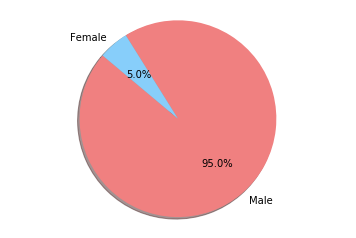

In [27]:

list2Bias('TopTitles.pdf', Top_Titles, "is ")

Man  is  chief medical examiner  by  1.9018497
Man  is  district attorney  by  2.361721
Man  is  associate medical examiner  by  1.48316
Man  is  deputy medical examiner  by  1.914506
Man  is  director of education  by  0.84936905
Man  is  medical epidemiologist  by  1.0545654
Man  is  county manager  by  2.1139507
Man  is  director  by  1.3846874
Man  is  inspector  by  1.4101686
Man  is  chief deputy  by  1.6423073
Man  is  county solicitor  by  2.7293391
Man  is  chief detective  by  1.9472504
Man  is  deputy controller  by  2.1054
Man  is  superintendent of police  by  3.339696
Man  is  first asst da/chief of staff  by  3.3580613
Man  is  dep dir office of admin  by  1.3327656
Man  is  executive deputy director  by  0.7566843
Man  is  senior deputy director  by  0.9998312
Man  is  commander  by  1.3849034
Man  is  warden  by  2.0242953
Man  is  chief emerg srvc fire marshall  by  1.0832081
Man  is  executive director  by  0.91696835
Man  is  public health lab director  by  0.646813

Man  is  it project manager  by  1.0180926
Man  is  clinic manager  by  0.6791048
Woman  is  911 logistics/equipment  by  -0.014598846
Man  is  manager - administration 911  by  1.1836166
Man  is  asst dep director maint oper  by  1.0389633
Man  is  lab info manage app manager  by  1.0795913
Man  is  caseworker practitioner sup  by  0.43372583
Man  is  asst mgr bridge engineering  by  2.4609156
Man  is  director s action line mgr  by  1.8266182
Man  is  court liason manager  by  0.7604847
Man  is  trial defender  by  1.7327414
Man  is  accounting manager - revenue  by  1.0515566
Man  is  adm reintegration alt housing  by  0.37971878
Man  is  aging care mgmnt supervisor 2  by  0.06456232
Man  is  civil engineer  by  2.351015
Man  is  chief investigator  by  1.7988157
Man  is  mgr employment and comp  by  1.8670378
Man  is  plumbing program manager  by  0.77362823
Man  is  resource services manager  by  0.8160596
Man  is  assistant operations manager  by  1.0507021
Man  is  internal affa

Man  is  air quality scientist  by  0.48170424
Man  is  risk manager  by  2.0530624
Man  is  parks superintendent  by  1.2060881
Man  is  supervisor - fiscal  by  1.3675613
Man  is  supervisor vouchers/payables  by  0.10723305
Woman  is  registered nurse  by  -4.9874945
Woman  is  community engagement  by  -1.0799294
Man  is  supervisor contract compliance  by  0.23363829
Man  is  emerg mgt hazmat coordinator  by  0.91735744
Man  is  911 accrd & prof coordinator  by  0.14086056
Man  is  purchasing manager  by  1.4914665
Man  is  lead bldg automated sys tech  by  1.3179045
Man  is  public health nutritionist sup  by  0.16055489
Man  is  training manager  by  1.287776
Man  is  workers compensation prog mgr  by  0.7193866
Man  is  administrative assistant  by  0.20563126
Man  is  officer - fixed assets/procure  by  1.0105128
Man  is  heavy equipment mechanic  by  0.60227585
Man  is  construction inspector  by  0.89812374
Man  is  telecommunication officer  by  1.4921045
Man  is  emergency

Man  is  contract/certification gen  by  0.115039825
Man  is  plumber laborer  by  0.58933353
Man  is  utility manager  by  1.7904711
Man  is  customer service manager  by  0.62220764
Man  is  payroll manager  by  1.6958513
Man  is  asst disbursement div mgr  by  1.1002388
Man  is  caseworker (longevity step)  by  0.29838514
Woman  is  professional development spec  by  -0.46635914
Man  is  operations manager  by  1.0403528
Man  is  maintenance supervisor  by  0.710866
Man  is  hr manager  by  0.35310364
Man  is  senior park ranger  by  1.4571571
Woman  is  mental health specialist  by  -0.13599682
Man  is  development specialist  by  0.84000397
Man  is  accountant  by  1.2072287
Man  is  manager registration  by  0.8012109
Man  is  payroll technician  by  1.175004
Man  is  special program/fiscal manager  by  1.241621
Man  is  administrative specialist-pt  by  1.094408
Man  is  asst chief inspector  by  1.8718605
Man  is  web developer  by  1.0603914
Man  is  identification technician 

Woman  is  lactation consultant  by  -1.399478
Man  is  real estate recording tech  by  0.47053146
Man  is  payroll/technology coordinator  by  0.14246559
Woman  is  homemaker  by  -0.5699806
Woman  is  recreation aide  by  -0.1762681
Man  is  contract specialist  by  1.4689136
Woman  is  child welfare aide  by  -0.48169374
Man  is  photographer 1  by  0.30118847
Man  is  building guard  by  1.3759947
Man  is  financial analyst  by  1.4655962
Woman  is  substance abuse counselor - pt  by  -0.88695526
Man  is  payroll/forfeiture clerk  by  0.24737144
Woman  is  human resource/program coord  by  -0.23051834
Man  is  fiscal technician  by  1.0668364
Man  is  senior data entry operator 1  by  1.668189
Man  is  engineering process tech 1  by  0.8836317
Man  is  air quality electronic tech  by  0.750412
Man  is  cntrct monitor tech ast anlyst  by  0.046108723
Man  is  investigator  by  1.0599632
Man  is  coordinator/graphic designer  by  0.14712143
Woman  is  nursing assistant  by  -2.456629

Man  is  systems software assistant  by  1.448092
Man  is  clerk 1  by  0.5885916
Man  is  clerk 10  by  0.79169416
Man  is  regional office manager  by  0.2794628
Man  is  records coordinator  by  0.694273
Man  is  drug/alcohol counselor  by  0.03814745
Woman  is  per diem nursing assisstant  by  -0.04329157
Woman  is  messenger  by  -0.59017324
Man  is  records clerk  by  1.0324545
Man  is  psychiatric aide  by  0.056589127
Man  is  real estate clerk  by  0.7208791
Man  is  modified duty assistant  by  0.0978384
Woman  is  recreational therapist  by  -0.48766327
Man  is  legal research assistant  by  0.13371181
Man  is  legal clerk  by  0.4726982
Man  is  pharmacy technician  by  1.4133682
Man  is  medical assistant  by  0.3422575
Man  is  caseworker - mhr  by  0.9785752
Man  is  caseworker - com svs.  by  0.9580741
Man  is  pt registerd nurse  by  0.077381134
Man  is  administrative specialist  by  1.1183472
Woman  is  interpretive naturalist  by  -0.7333598
Man  is  master file spe

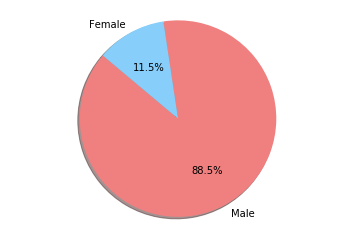

In [29]:

list2Bias_norm('TopTitles_without_prior.pdf', Top_Titles, " ", "is ")

### e) Associating skills sought by Google with a group

#### Dataset: https://www.kaggle.com/niyamatalmass/google-job-skills

### f) Associating skills sought by Amazon with a group

#### Dataset: https://www.kaggle.com/atahmasb/amazon-job-skills

### h) Associating skills sought by US based jobs (20k) on Dice.com

#### Dataset: https://www.kaggle.com/PromptCloudHQ/usbased-jobs-from-dicecom


# -----ROUGH------


### b) Bias for associating impactful roles with a group-

(Imperfect) Proxies for measuring impact- Salary, Prestige & Mixed (Based on dataset)

2.1 Salary

#### Datasets:

https://www.careeronestop.org/Toolkit/Wages/highest-paying-careers.aspx

2.2 Prestige: 

#### Datasets:

https://www.businessinsider.com/most-prestigious-jobs-in-america-2014-11




2.3 Other methodologies

Dataset: 




3. Bias for associating professional traits with a group-

#### Datasets:

https://www.monster.ca/career-advice/article/50-personality-traits-for-the-workplace-canada

https://learning.linkedin.com/blog/top-skills/the-skills-companies-need-most-in-2019--and-how-to-learn-them


Social/Cultural Impact-

1. Bias for associating negative traits (Eg- 'neurotic', 'weak') with a group

2. Bias for associating certain life roles  (Eg- 'homemaker' , 'bread winner') with a group




Some of this maybe extended to race as well-

1. Bias for associating negative traits with a group

2. Bias for associating profesional traits with a group

